### Building a RNN

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
#import the training set
data_train = pd.read_csv("Google_Stock_Price_Train.csv")
data_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [16]:
training_set = data_train.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [17]:
#feature scaling: we are using normalization here

from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [23]:
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0]) 
    #print(training_set_scaled[i-60:i,0])

    y_train.append(training_set_scaled[i,0])
   # print("y_train : ",training_set_scaled[i,0])
    
#converting list to numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

In [24]:
len(X_train)

1198

In [25]:
len(y_train)

1198

In [26]:
#Reshaping -  adding a new dimension to connvert 2D-3D
X_train= np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [27]:
# Building the RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [28]:
#initializing the RNN
reg = Sequential()

In [30]:
#adding LSTM layer and dropout regularization
reg.add(LSTM(units=50, return_sequences = True,input_shape=(X_train.shape[1],1))) 
#50 neurons
# Return sequences should be true if you want to add another LSTM layer


# adding dropout regularization
reg.add(Dropout(0.2)) #20% dropout (20% neurons will be ignored during each iteration of the training)

In [31]:
#adding 2nd LSTM layers
reg.add(LSTM(units=50, return_sequences = True)) 
reg.add(Dropout(0.2)) 

#adding 3rd LSTM layers
reg.add(LSTM(units=50, return_sequences = True)) 
reg.add(Dropout(0.2)) 

#adding 4th LSTM layers
reg.add(LSTM(units=50, return_sequences = False)) 
reg.add(Dropout(0.2))

In [33]:
#Adding Output Layer
reg.add(Dense(units=1))

In [38]:
#compiling RNN
reg.compile(optimizer='adam', loss= 'mean_squared_error') 

# RMSprop/adam is recommended fro RNN in Keras
# loss is fro regression hence continuous loss function is needed which is MSE

In [39]:
#fitting the RNN to the training set

reg.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 15s 105ms/step - loss: 0.0079
Epoch 2/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0043
Epoch 3/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0045
Epoch 4/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0051
Epoch 5/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0039
Epoch 6/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0041
Epoch 7/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0029
Epoch 8/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0056
Epoch 9/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0048
Epoch 10/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0032
Epoch 11/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0035
Epoch 12/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0043
Epoch 13/100

In [42]:
# making the predictiona nd visualizing the results
data_test = pd.read_csv("Google_stock_Price_Test.csv")
real_stock_price = data_test.iloc[:,1:2].values
#real_stock_price

In [44]:
#getting the  predicted stock prices in 2017
data_total = pd.concat((data_train["Open"], data_test["Open"]), axis =0) #vertical concat
inputs=data_total[len(data_total)-len(data_test) -60:].values
inputs= inputs.reshape(-1,1)
inputs= sc.transform(inputs)  #sc object was alred fitted hence using transform

In [45]:
X_test=[]

for i in range(60,80):
    X_test.append(inputs[i-60:i,0]) 
    
    
#converting list to numpy array
X_test = np.array(X_test)

In [46]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) #3d structure

In [47]:
predicted_Google_stock_price= reg.predict(X_test)
#inverse transform 
predicted_Google_stock_price= sc.inverse_transform(predicted_Google_stock_price)


In [48]:
predicted_Google_stock_price

array([[766.0644 ],
       [762.75604],
       [770.8874 ],
       [767.027  ],
       [774.96185],
       [783.0924 ],
       [782.1612 ],
       [779.81195],
       [782.7377 ],
       [782.7025 ],
       [782.3128 ],
       [781.45   ],
       [781.29755],
       [783.1029 ],
       [783.14014],
       [796.6918 ],
       [799.89557],
       [806.5921 ],
       [802.78625],
       [787.4885 ]], dtype=float32)

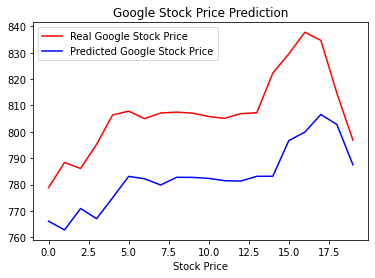

In [50]:
#visualizing the final results
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_Google_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.xlabel("Stock Price")
plt.legend()
plt.show()